# Homework 2: Pandas and simple visualization

Дані для домашнього завдання були взяті з Kaggle, по [посиланню](https://www.kaggle.com/aungpyaeap/supermarket-sales) ви зможете знайти їх опис.

*   Invoice id: Computer generated sales slip invoice identification number

*   Branch: Branch of supercenter (3 branches are available identified by A, B and C).

*   City: Location of supercenters

*   Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

*   Gender: Gender type of customer

*   Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

*   Unit price: Price of each product in $

*   Quantity: Number of products purchased by customer

*   Tax: 5% tax fee for customer buying

*   Total: Total price including tax

*   Date: Date of purchase (Record available from January 2019 to March 2019)

*   Time: Purchase time (10am to 9pm)

*   Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

*   COGS: Cost of goods sold

*   Gross margin percentage: Gross margin percentage

*   Gross income: Gross income

*   Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Для тих хто використовує Google Colab, не забудьте перед початком роботи загрузити файл supermarket_sales.csv або скористайтесь одним з методів наведених в [статті](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

1. Використовуючи  Pandas прочитайте набір даних в DataFrame з файлу  'supermarket_sales.csv'.

In [2]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/tetiana-zhuchenko/test/main/supermarket_sales%20-%20Sheet1.csv'

df = pd.read_csv(url)

print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

2. Відобразіть 5 перших записів і 5 останніх записів

In [3]:
# Display the first 5 rows
print("First 5 records:")
print(df.head())

# Display the last 5 rows
print("Last 5 records:")
print(df.tail())

First 5 records:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415

3. Виведіть назви колонок разом з їх типами даних

In [4]:
print("Column names and their data types:")
print(df.dtypes)

Column names and their data types:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


4. Скільки колонок мають текстовий тип даних? А скільки колонок мають числовий тип даних (float/int)? Відповідь треба дати за допомогою функцій бібіліотеки Pandas. Формат відповіді: тип - кількість колонок. Також, відповідь вважатиметься правильною, якщо для типів float і int будуть окермі стрічки у відповіді (тобто обʼєднувати їх необовʼязково).

In [5]:
text_columns = df.select_dtypes(include='object').shape[1]
int_columns = df.select_dtypes(include='int64').shape[1]
float_columns = df.select_dtypes(include='float64').shape[1]

print(f"Text (object) columns: {text_columns}")
print(f"Integer (int64) columns: {int_columns}")
print(f"Float (float64) columns: {float_columns}")

Text (object) columns: 9
Integer (int64) columns: 1
Float (float64) columns: 7


5. Яку кількість покупок зробили чоловіки, а яку жінки?
Спробуйте отримати відповідь за допомогою методу value_counts(), а також методу groupby()

In [6]:
gender_counts_value_counts = df['Gender'].value_counts()

gender_counts_groupby = df.groupby('Gender').size()

# Display the results
print("Purchases by gender using value_counts():")
print(gender_counts_value_counts)

print("\nPurchases by gender using groupby():")
print(gender_counts_groupby)

Purchases by gender using value_counts():
Gender
Female    501
Male      499
Name: count, dtype: int64

Purchases by gender using groupby():
Gender
Female    501
Male      499
dtype: int64


6. Які існують унікальні продуктові лінії? (Product line)

In [7]:
unique_product_lines = df['Product line'].unique()

print("Unique product lines:")
print(unique_product_lines)

Unique product lines:
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


7. Яка середня ціна товару (Unit price) для кожної продуктової лінії (Product line)?
Hint: отримати відповідь можна за допомогою лиш однієї стрічки коду =)

In [8]:
df.groupby('Product line')['Unit price'].mean()

,Unit price
Product line,
Electronic accessories,53.551588
Fashion accessories,57.153652
Food and beverages,56.008851
Health and beauty,54.854474
Home and lifestyle,55.316937
Sports and travel,56.993253


8. Перетворіть колонку Date в формат datetime.

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Display the first few rows to verify the conversion
print(df['Date'].head())

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]


9. За допомогою команди plot() побудуйте лінійний графік суми всіх покупок за кожен день. Нехай лінія буде зеленого кольору :) Не забудьте підписати вісі і дати графіку назву (title). Oберіть комфортніший для вас спосіб: чи то за допомогою методів pandas, чи за допомогою Matplotlib. Або навіть обома!
Для виконання даного завдання необхідно просумувати колонку Total для кожного дня

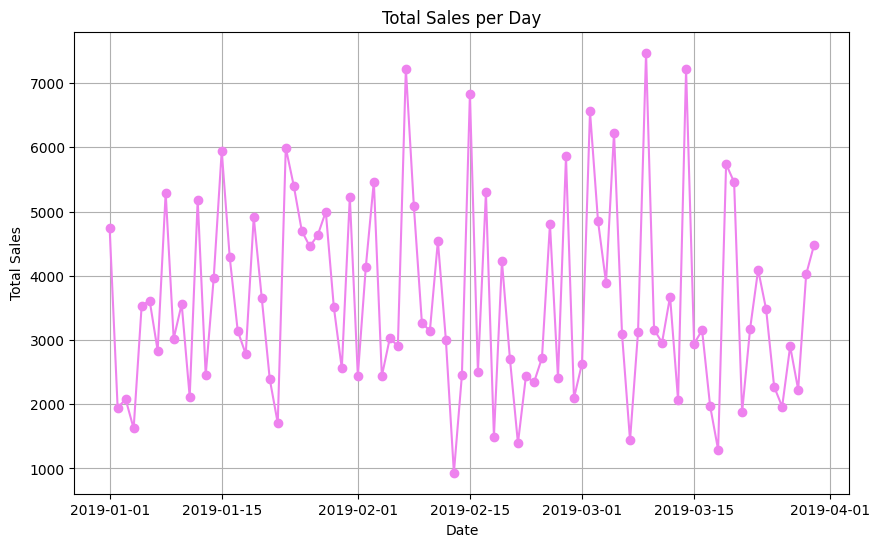

In [10]:
import matplotlib.pyplot as plt
daily_sales = df.groupby('Date')['Total'].sum()

# Plot the data using matplotlib
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales.values, color='violet', linestyle='-', marker='o')

# Add title and axis labels
plt.title('Total Sales per Day')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.grid(True)
plt.show()

10. А тепер побудуйте графік кількості подобових продажів в кожному філіалі (Branch). Вкажіть розмір фігури (10, 6). На одному графіку має відображатись лінія для кожного філіалу. Лінії мають бути різного кольору. Кількість продажів можна порахувати як кількість унікальних Invoice ID.

Один зі способів виконання завдання є створення наступної структури даних:
1. зробити індексом дату
2. колонки - це назви філіалів
3. Значення кількість продажів в конкретну дану в конкретному філіалу
4. Зробити таку транформацію можна за допомогою функції `pivot_table()`
5. Таку таблицю можна легко відобразити на графіку за допомогою функції `DataFrame.plot()`  


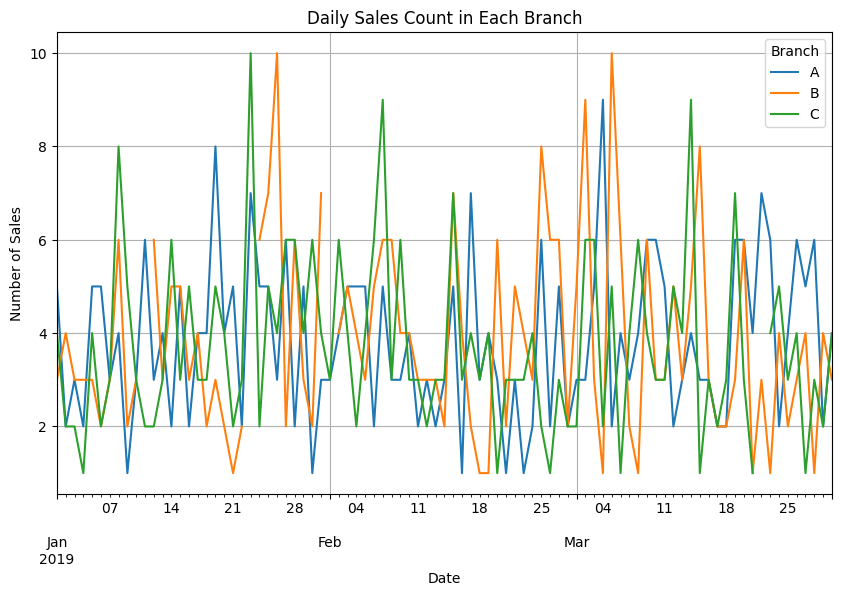

In [11]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create a pivot table where rows are dates, columns are branches, and values are the count of unique 'Invoice ID'
pivot_table = df.pivot_table(index='Date', columns='Branch', values='Invoice ID', aggfunc='nunique')

# Plot the pivot table
plt.figure(figsize=(10, 6))
pivot_table.plot(ax=plt.gca())

# Add title and axis labels
plt.title('Daily Sales Count in Each Branch')
plt.xlabel('Date')
plt.ylabel('Number of Sales')

# Show the legend and grid
plt.grid(True)
plt.legend(title='Branch')

plt.show()

Воу-воу, якось тяжко зрозуміти щось на такому графіку. Давайте спробуємо інакше. Покажіть кількість продажів для кодного філіала на окремому графіку.
Досить просто зробити це, вказавши `subplots=True` в функції `plot()`.  
Задайте розмір фігури (10,10).

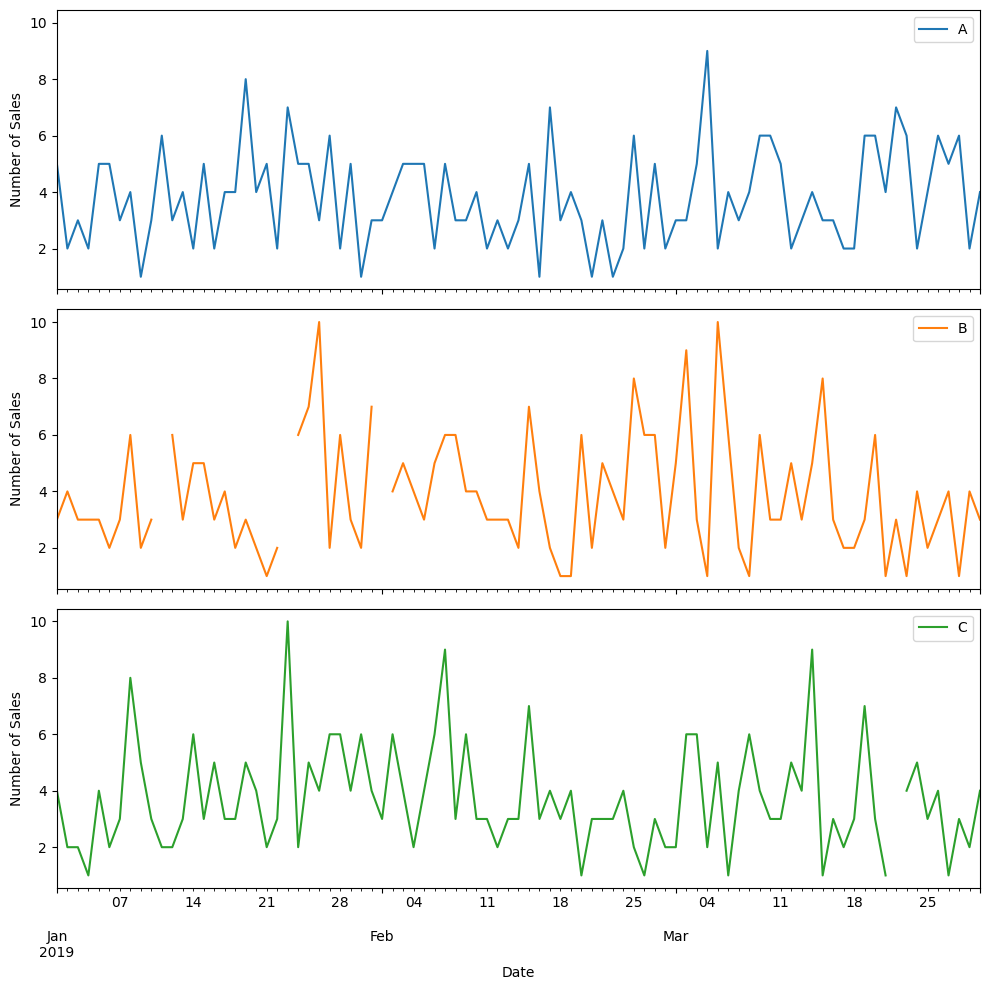

In [12]:
# Create a pivot table where rows are dates, columns are branches, and values are the count of unique 'Invoice ID'
pivot_table = df.pivot_table(index='Date', columns='Branch', values='Invoice ID', aggfunc='nunique')

# Plot each branch's sales on separate subplots
pivot_table.plot(subplots=True, figsize=(10, 10), layout=(len(pivot_table.columns), 1), sharex=True, sharey=True)

# Add titles and labels
for ax in plt.gcf().axes:
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Sales')
    ax.set_title(ax.get_title().split(' ')[-1])  # Set the title as the branch name

plt.tight_layout()
plt.show()

<font color='blue'>**[Optional]**</font> Давайте зробимо графіки ще зручнішими для сприйняття. Хочеться їх трохи згладити. Одним з методів згладування є ковзне середнє (Moving Average - MA). Суть методу полягає в тому, що значення кожної точки дорівнює середньому значенню N попередніх точок. Це один з найпростіших методів згладжування набору статистичних даних і має кілька варіацій. [Тут](https://www.youtube.com/watch?v=7Rz_ITRIADg) непогано відео на тему.

Для того, щоб порахувати ковзне середнє можемо використати функцію [pandas.DataFrame.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).     

Используя параметры window=10 и min_periods=1 выведите сглаженные подневные графики количества продаж по филиалам.

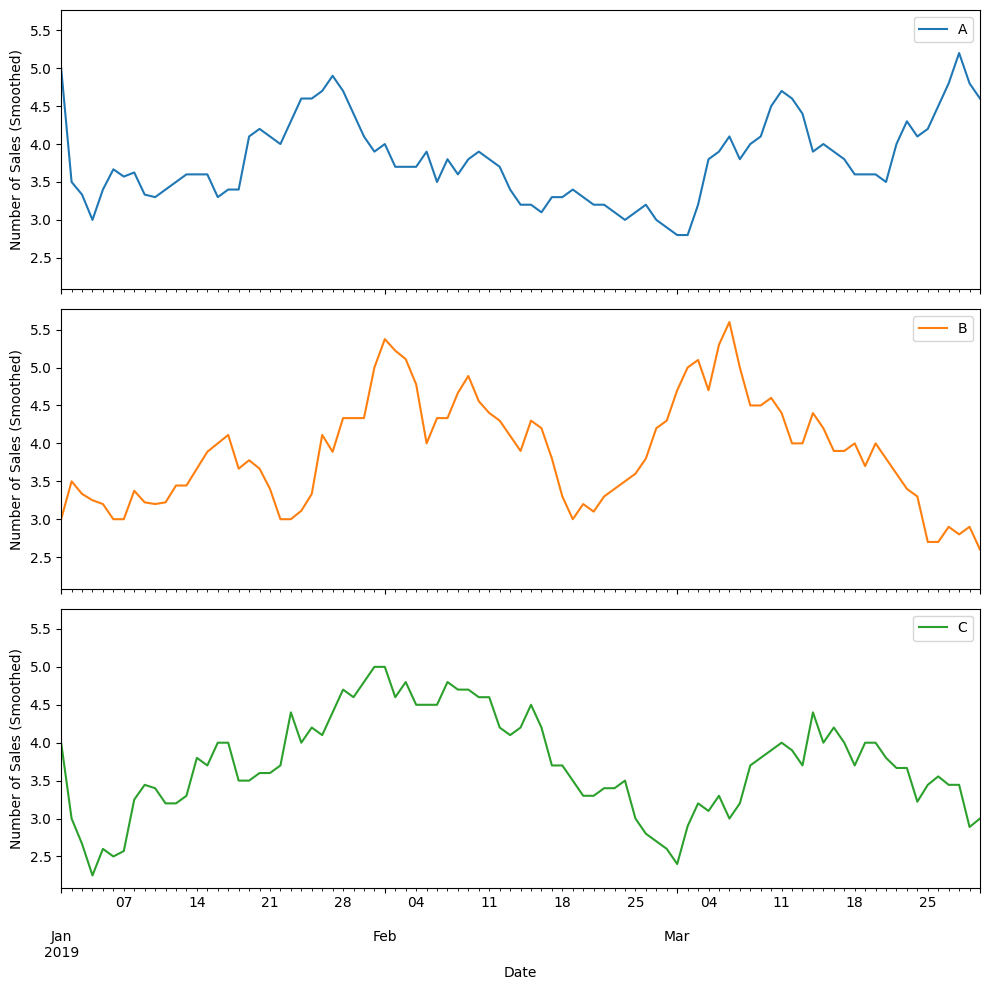

In [13]:
# Create a pivot table where rows are dates, columns are branches, and values are the count of unique 'Invoice ID'
pivot_table = df.pivot_table(index='Date', columns='Branch', values='Invoice ID', aggfunc='nunique')

# Calculate the moving average with a window of 10 and min_periods=1
smoothed_data = pivot_table.rolling(window=10, min_periods=1).mean()

# Plot each branch's sales on separate subplots with smoothed data
smoothed_data.plot(subplots=True, figsize=(10, 10), layout=(len(smoothed_data.columns), 1), sharex=True, sharey=True)

# Add titles and labels
for ax in plt.gcf().axes:
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Sales (Smoothed)')
    ax.set_title(ax.get_title().split(' ')[-1])  # Set the title as the branch name

plt.tight_layout()
plt.show()

12. В якому місті знаходиться кожен з філіалів?

In [14]:
branch_city_mapping = df[['Branch', 'City']].drop_duplicates().set_index('Branch')

print("Branches and their corresponding cities:")
print(branch_city_mapping)

Branches and their corresponding cities:
             City
Branch           
A          Yangon
C       Naypyitaw
B        Mandalay


12. В яких містах покупці частіше розраховуються готівкоюй (`Cash`), а в яких - електронним гаманцем (`Ewallet`)?  
Для виконання цього завдання можна сформувати таблицю, де стрічки будуть відповідати способам оплати (`Payment`), в стовпці - `City`, значення - кількість покупок (вони ж -  продажі).

Цікавить саме відсоткове співвідношення покупок зроблених різними способами =)


In [15]:
pivot_table = df.pivot_table(index='Payment', columns='City', values='Invoice ID', aggfunc='count')

# Calculate the percentage of each payment method for each city
payment_percentage = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100

# Display the percentage table
print("Percentage of purchases by payment method in each city:")
print(payment_percentage)

Percentage of purchases by payment method in each city:
City          Mandalay  Naypyitaw     Yangon
Payment                                     
Cash         33.132530  37.804878  32.352941
Credit card  32.831325  29.878049  30.588235
Ewallet      34.036145  32.317073  37.058824


<font color='blue'>**[Optional]**</font> 13. Давайте тепер проаналізуємо розподіл цін на товари в різних продуктових лінійках. Наша ціль - знайти відповідь на питання: в якій продуктовій лінійці найбільше дорогих товарів (90-100 у.о.)?

Для початку побудуємо візуалізацію і зробимо це кількома способами. Подумайте, яка є більш інформативною для вас і яку би ви використали для роботи.


  13.1.  На одній фігурі відобразіть гістограму розподілу цін на товари для кожної продуктової лінійкию Тобто на одній фігурі кількість гістограм рівна кількості продуктових лінійок.

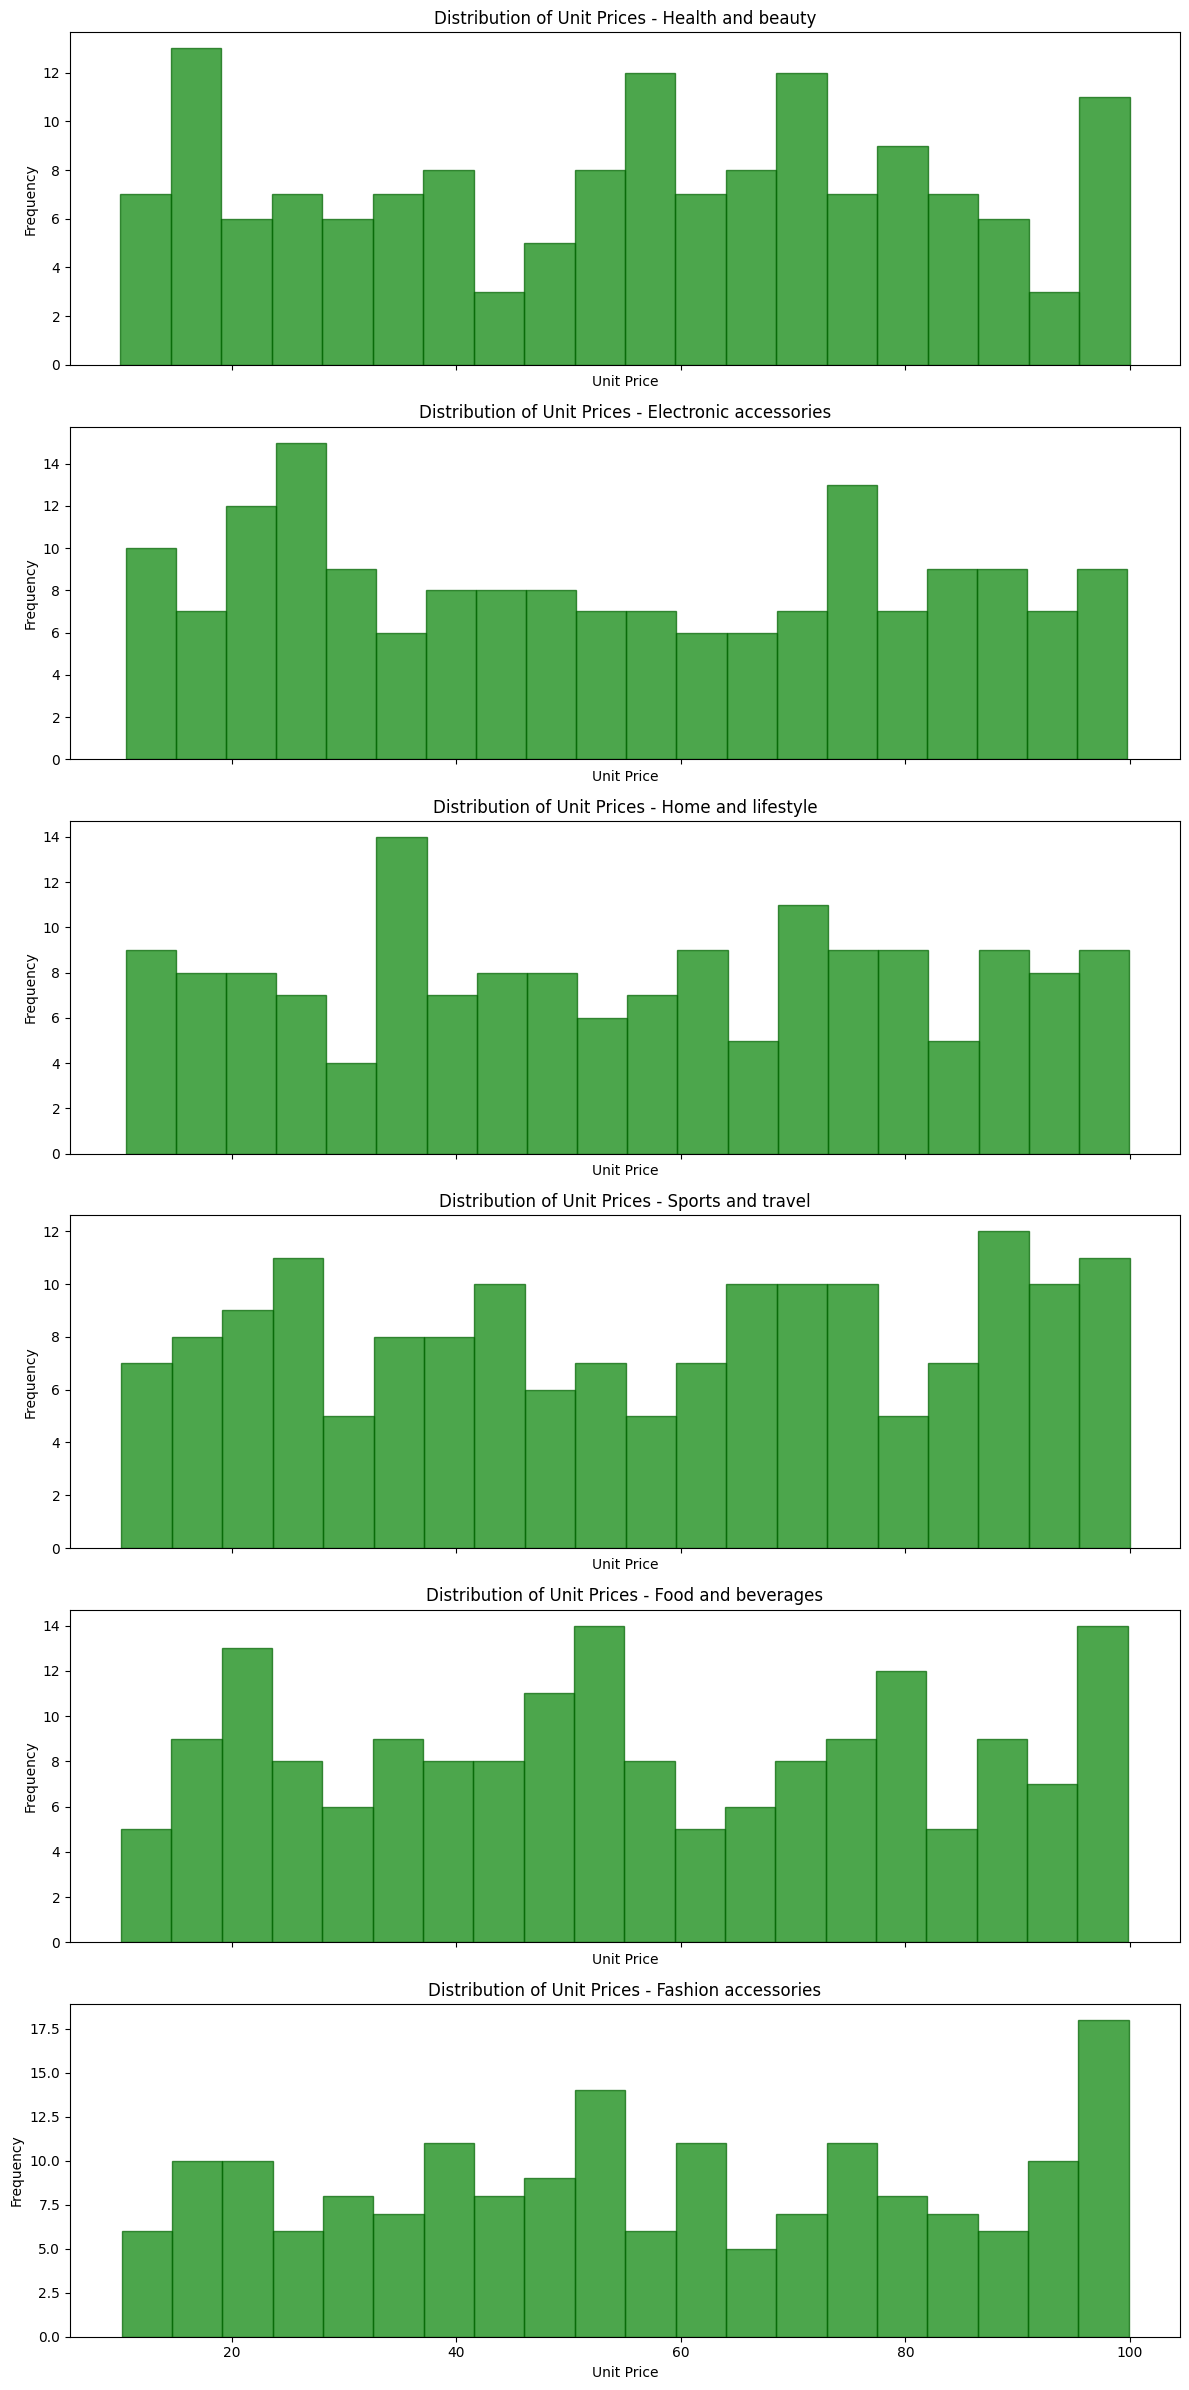

In [16]:
product_lines = df['Product line'].unique()
num_product_lines = len(product_lines)
fig, axes = plt.subplots(nrows=num_product_lines, ncols=1, figsize=(12, num_product_lines * 4), sharex=True)

# Iterate over each product line and create a subplot
for ax, product_line in zip(axes, product_lines):
    # Filter data for the current product line
    subset = df[df['Product line'] == product_line]
    # Plot histogram for the current product line
    ax.hist(subset['Unit price'], bins=20, alpha=0.7, color='green', edgecolor='darkgreen')
    # Set title and labels
    ax.set_title(f'Distribution of Unit Prices - {product_line}')
    ax.set_xlabel('Unit Price')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

13.2. А тепер відобразіть гістограми з однаковою кількість бінів на одному графікую Для зручності використовуйте прозорість alpha не більше 0.4 і переконайтесь, що гістограми різного кольору. Не забудьте про легенду, заголовок.

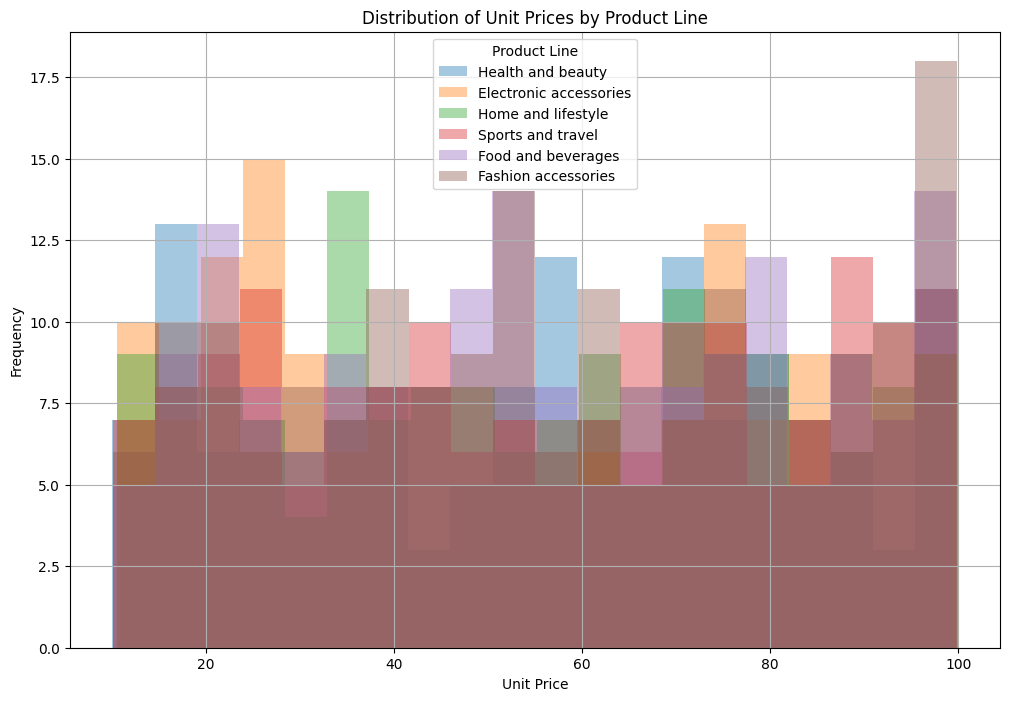

In [17]:
# Set the number of bins
num_bins = 20

# Create a figure
plt.figure(figsize=(12, 8))

# Define colors for the histograms
colors = plt.get_cmap('tab10').colors  # Using a colormap to get distinct colors

# Plot histogram for each product line
for idx, product_line in enumerate(df['Product line'].unique()):
    # Filter data for the current product line
    subset = df[df['Product line'] == product_line]
    # Plot histogram for the current product line
    plt.hist(subset['Unit price'], bins=num_bins, alpha=0.4, color=colors[idx % len(colors)], label=product_line)

# Add title and labels
plt.title('Distribution of Unit Prices by Product Line')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Product Line')

# Show grid
plt.grid(True)

# Show the plot
plt.show()

То яка візуалізація виявилась для вас зручнішою і чому?

На мою думку, гістограми з однаковою кількість бінів на одному графіку більш інформативна. Її зручніше аналізувати томущо всі дані знаходяться на одному зображенні.

13.3. А тепер знайдіть відповідь на питання за допомогою функцій numpy і pandas.

In [ ]:
# ваш код тут